## Load the iris dataset (scaled)

In [12]:
# add code here
import pandas as pd

df = pd.read_csv("../../datasets/iris_scaled.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


## Split the data into training and test sets 

In [13]:
# add code here
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Train a KNN classifier


In [35]:
# add code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica'], dtype=object)

### Evaluate the model

In [36]:
# add code here
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


### Try to compute the optimal value of k

In [38]:
# add code here
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 31))
k_scores = []

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

k_scores

[0.9709090909090909,
 0.940909090909091,
 0.9609090909090909,
 0.9609090909090909,
 0.9609090909090909,
 0.9609090909090909,
 0.9709090909090909,
 0.9700000000000001,
 0.9609090909090909,
 0.9609090909090909,
 0.9809090909090908,
 0.9509090909090909,
 0.9718181818181819,
 0.9709090909090909,
 0.9618181818181819,
 0.9800000000000001,
 0.9709090909090909,
 0.940909090909091,
 0.940909090909091,
 0.930909090909091,
 0.9509090909090909,
 0.9218181818181819,
 0.9227272727272728,
 0.9218181818181819,
 0.9136363636363637,
 0.9127272727272728,
 0.8936363636363636,
 0.8845454545454545,
 0.8936363636363638,
 0.8936363636363638]

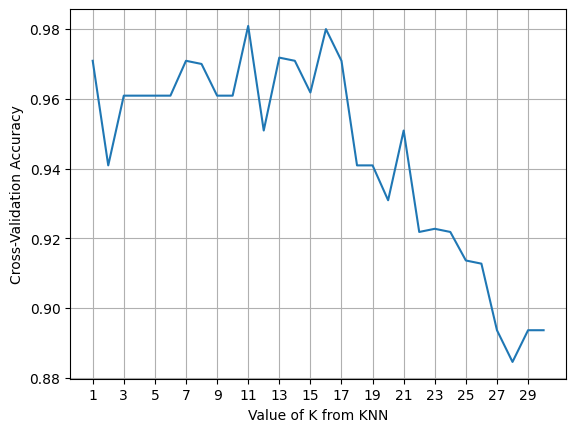

In [41]:
from matplotlib import pyplot as plt
import numpy as np

plt.plot(k_values, k_scores)
plt.xlabel('Value of K from KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.xticks(np.arange(1, 30, step=2))
plt.show()

### Traind and Evaluate the model with the optimal value of k


In [18]:
# add code here
knn_optimal = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.75      0.86      0.80        14
   virginica       0.82      0.69      0.75        13

    accuracy                           0.87        45
   macro avg       0.86      0.85      0.85        45
weighted avg       0.87      0.87      0.87        45

0.8666666666666667


## Train a Naive Bayes classifier

In [19]:
# add code here
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica'], dtype='<U10')

### Evaluate the model


In [21]:
# add code here
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.81      0.93      0.87        14
   virginica       0.91      0.77      0.83        13

    accuracy                           0.91        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45

0.9111111111111111
